Primer examen de Laboratorio

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import os

import numpy as np

from matplotlib import pyplot

from scipy import optimize

from sklearn.model_selection import train_test_split

%matplotlib inline

import pandas as pd
import sklearn as skl

from sklearn.preprocessing import StandardScaler

In [22]:
url = "/content/drive/MyDrive/Colab Notebooks/Datasets/train_dataset.csv"
dataframe = pd.read_csv(url)

print(dataframe)
x = dataframe.iloc[:, 0:21].values
y = dataframe.iloc[:, 22].values

       age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0       35         170          85       97.0             0.9   
1       20         175         110      110.0             0.7   
2       45         155          65       86.0             0.9   
3       45         165          80       94.0             0.8   
4       20         165          60       81.0             1.5   
...    ...         ...         ...        ...             ...   
38979   40         165          60       80.0             0.4   
38980   45         155          55       75.0             1.5   
38981   40         170         105      124.0             0.6   
38982   40         160          55       75.0             1.5   
38983   55         175          60       81.1             1.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0                  0.9              1               1       118          78   
1                  0.9              1               1       1

In [23]:
print(x)
print(y)

[[  35.  170.   85. ...   61.  115.  125.]
 [  20.  175.  110. ...   19.   25.   30.]
 [  45.  155.   65. ... 1090. 1400.  276.]
 ...
 [  40.  170.  105. ...   24.   23.   35.]
 [  40.  160.   55. ...   24.   20.   17.]
 [  55.  175.   60. ...   18.   12.   16.]]
[1 0 0 ... 1 1 1]


In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [25]:
def calculate_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1/m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    return cost

In [26]:
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = (1/m) * np.dot(X.T, (h - y))
    return grad

In [27]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        theta -= alpha * gradient(theta, X, y)
        J_history.append(calculate_cost(theta, X, y))
    return theta, J_history

In [28]:
def feature_normalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [31]:
X_train_norm = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_test_norm = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]

In [38]:
alpha = 0.01
num_iters = 5000

In [39]:
theta = np.zeros(X_train_norm.shape[1])

In [40]:
theta, J_history = gradient_descent(X_train_norm, y_train, theta, alpha, num_iters)

In [41]:
predictions = sigmoid(np.dot(X_test_norm, theta))
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0
accuracy = np.mean(predictions == y_test)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.720790047454149


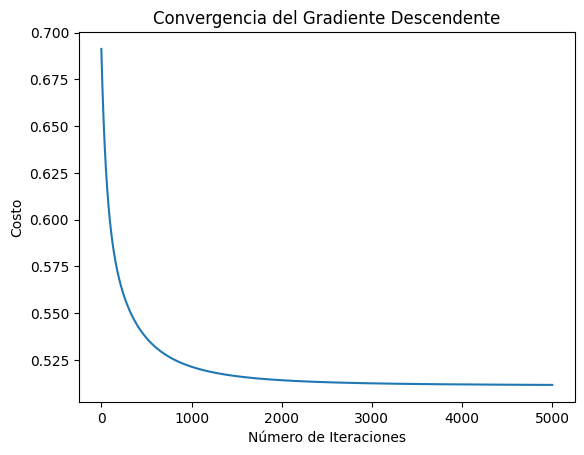

theta calculado por el descenso por el gradiente: [-0.75698984  0.00580561  0.68996791 -0.15503958 -0.00726035 -0.00441449
  0.01270856 -0.01518035  0.01918592 -0.11191167  0.02186736  0.0910393
 -0.13512591  0.30993156 -0.07347193 -0.03536846  0.68259487 -0.02485887
  0.05565065 -0.04562464 -0.16280367  0.48988444]


In [42]:
pyplot.plot(range(num_iters), J_history)
pyplot.xlabel('Número de Iteraciones')
pyplot.ylabel('Costo')
pyplot.title('Convergencia del Gradiente Descendente')
pyplot.show()
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [43]:
print(X_test)
print(theta)

[[ 25. 175.  80. ...  32.  38.  14.]
 [ 55. 170.  65. ...  28.  21.  15.]
 [ 50. 170.  70. ...  31.  34.  98.]
 ...
 [ 30. 170.  75. ...  16.  17.  37.]
 [ 40. 170.  55. ...  20.  16.  29.]
 [ 40. 160.  50. ...  15.  15.  33.]]
[-0.75698984  0.00580561  0.68996791 -0.15503958 -0.00726035 -0.00441449
  0.01270856 -0.01518035  0.01918592 -0.11191167  0.02186736  0.0910393
 -0.13512591  0.30993156 -0.07347193 -0.03536846  0.68259487 -0.02485887
  0.05565065 -0.04562464 -0.16280367  0.48988444]


In [44]:
from sklearn.svm import SVC

classifier =  SVC()

classifier.fit(X_train, y_train)

print(classifier.score(X_test, y_test))

0.7318199307425933
